### Codio Activity 22.3: Basic Weight Update

This activity focuses on updating the weights to improve the performance of the network.  To demonstrate this update process, we implement a basic loss function and its derivative to update randomly initialized weights.  You begin with a very basic dataset meant to replicate the logic gate problems surrounding the early ANN models.

#### Index

- [Problem 1](#-Problem-1)
- [Problem 2](#-Problem-2)
- [Problem 3](#-Problem-3)
- [Problem 4](#-Problem-4)
- [Problem 5](#-Problem-5)
- [Problem 6](#-Problem-6)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 1])

In [3]:
nos = X[y == 0]
nos

array([[0, 0]])

In [4]:
yesses = X[y == 1]
yesses

array([[0, 1],
       [1, 0],
       [1, 1]])

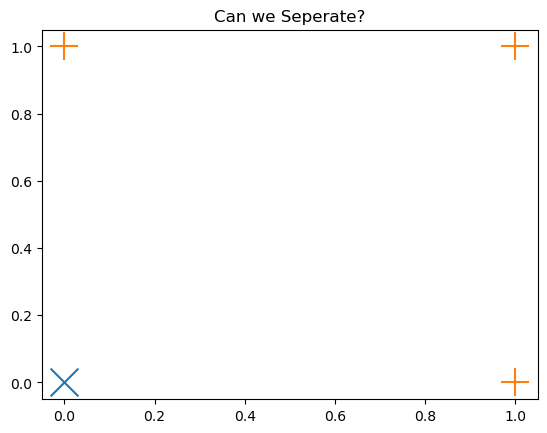

In [5]:
plt.scatter(nos[:, 0], nos[:, 1], marker = 'x', s = 400)
plt.scatter(yesses[:, 0], yesses[:, 1], marker = '+', s = 400)
plt.title("Can we Seperate?");

### Problem 1

#### Preparing the Data

To prepare the data for modeling, you will need to add a bias term.  In this example, you are to prepend a column of -1's to the array `X` and save the new array as `Xt` below.

In [7]:
bias = np.ones((X.shape[0],1)) * -1
bias

array([[-1.],
       [-1.],
       [-1.],
       [-1.]])

In [9]:
Xt = np.concat([bias, X], axis = 1)
Xt

array([[-1.,  0.,  0.],
       [-1.,  0.,  1.],
       [-1.,  1.,  0.],
       [-1.,  1.,  1.]])

In [14]:
Xt = np.concatenate((bias, X), axis = 1)
Xt

array([[-1.,  0.,  0.],
       [-1.,  0.,  1.],
       [-1.,  1.,  0.],
       [-1.,  1.,  1.]])

### Problem 2

#### Initializing the weights

Below, an array of weights is given for both the bias term and the two features.  Use this weight array `w` to apply these weights to the input and bias.  Assign this product to `weighted_sum` below.

In [15]:
#weight array
w = np.array([-0.05, -0.02, 0.02])

In [16]:
weighted_sum = Xt@w
weighted_sum

array([0.05, 0.07, 0.03, 0.05])

### Problem 3

#### Activation Function

Now, use the basic threshold activation function to output 1 if the input is greater than 0, otherwise label it 0.  Assign the values as `predictions` below.  Apply this threshold function to the weighted sum.  What is the accuracy of the classifier after 1 epoch?  

In [17]:
predictions = np.where(weighted_sum >0, 1,0)
predictions

array([1, 1, 1, 1])

### Problem 4

#### Weight Update

Next, you want to update the initial weights using the following rule for gradient descent with learning rate $\alpha$:

$$w_{i + 1} = w_{i} + \alpha(y - \hat{y})x$$

Use this rule to update the initial weights with $\alpha = 0.1$ and assign to `w2` below.

In [19]:
w2 = w + 0.1 * (y - predictions)@Xt
w2

array([ 0.05, -0.02,  0.02])

### Problem 5

#### Putting it together

Now, consider building a model by performing 10 iterations of the weight updates.  What is the accuracy?  Assign this to `ans5` below.

In [20]:
w = np.array([-0.05,-0.02,0.02])
w

array([-0.05, -0.02,  0.02])

In [22]:
for i in range(10):
    predictions = np.where(Xt@w >0, 1, 0)
    w = w + 0.1* (y - predictions)@Xt
ans5 = sum(predictions == y)/len(y)
print(ans5)
print(w)
print(predictions)

1.0
[0.05 0.18 0.22]
[0 1 1 1]


### Problem 6

#### A Larger Example

Below, a second example is constructed using a synthetic dataset.  Your goal is to use the algorithm for updating the weights.  Determie the accuracy and assign as `ans6` below.

In [23]:
from sklearn.datasets import make_blobs

In [27]:
X,y = make_blobs(centers = 2, center_box = (-3,3), random_state = 22)

Text(0.5, 1.0, 'Synthetic Binary Dataset')

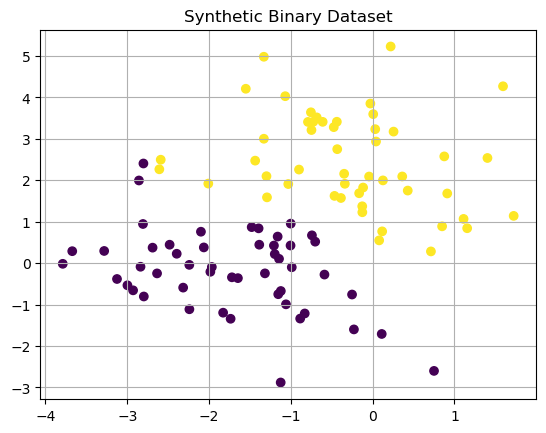

In [30]:
plt.scatter(X[:,0],X[:,1], c = y)
plt.grid()
plt.title('Synthetic Binary Dataset')

In [31]:
w = np.array([0, 0, 0])
biases = np.ones((X.shape[0], 1))
X2 = np.concatenate((biases, X), axis = 1)
for i in range(100):
    #perform our estimation
    predictions = np.where(X2@w > 0, 1, 0)
    #print(preds)
    #weight update
    w = w + 0.1*(y - predictions)@X2
ans6 = sum(predictions == y)/len(y)

print(w)
print(ans6)

[-1.4         7.85617133  9.69891443]
1.0
